In [8]:
from configs.config_3x3_16_3x3_32_3x3_64_nc import config
# from utils.dataset import MovingMNISTDataset
from utils.dataset_nc import NcDataset
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.utils.data import DataLoader

In [9]:
vis_dataset = NcDataset(config)
batch_size = 5
vis_loader = DataLoader(vis_dataset, batch_size=batch_size,
                       num_workers=config.num_workers, shuffle=False, pin_memory=True)

Loaded 800 samples (train)


torch.Size([5, 6, 1, 64, 64]) torch.Size([5, 6, 1, 64, 64]) tensor(2.3832, device='cuda:0') tensor(-0.1615, device='cuda:0')


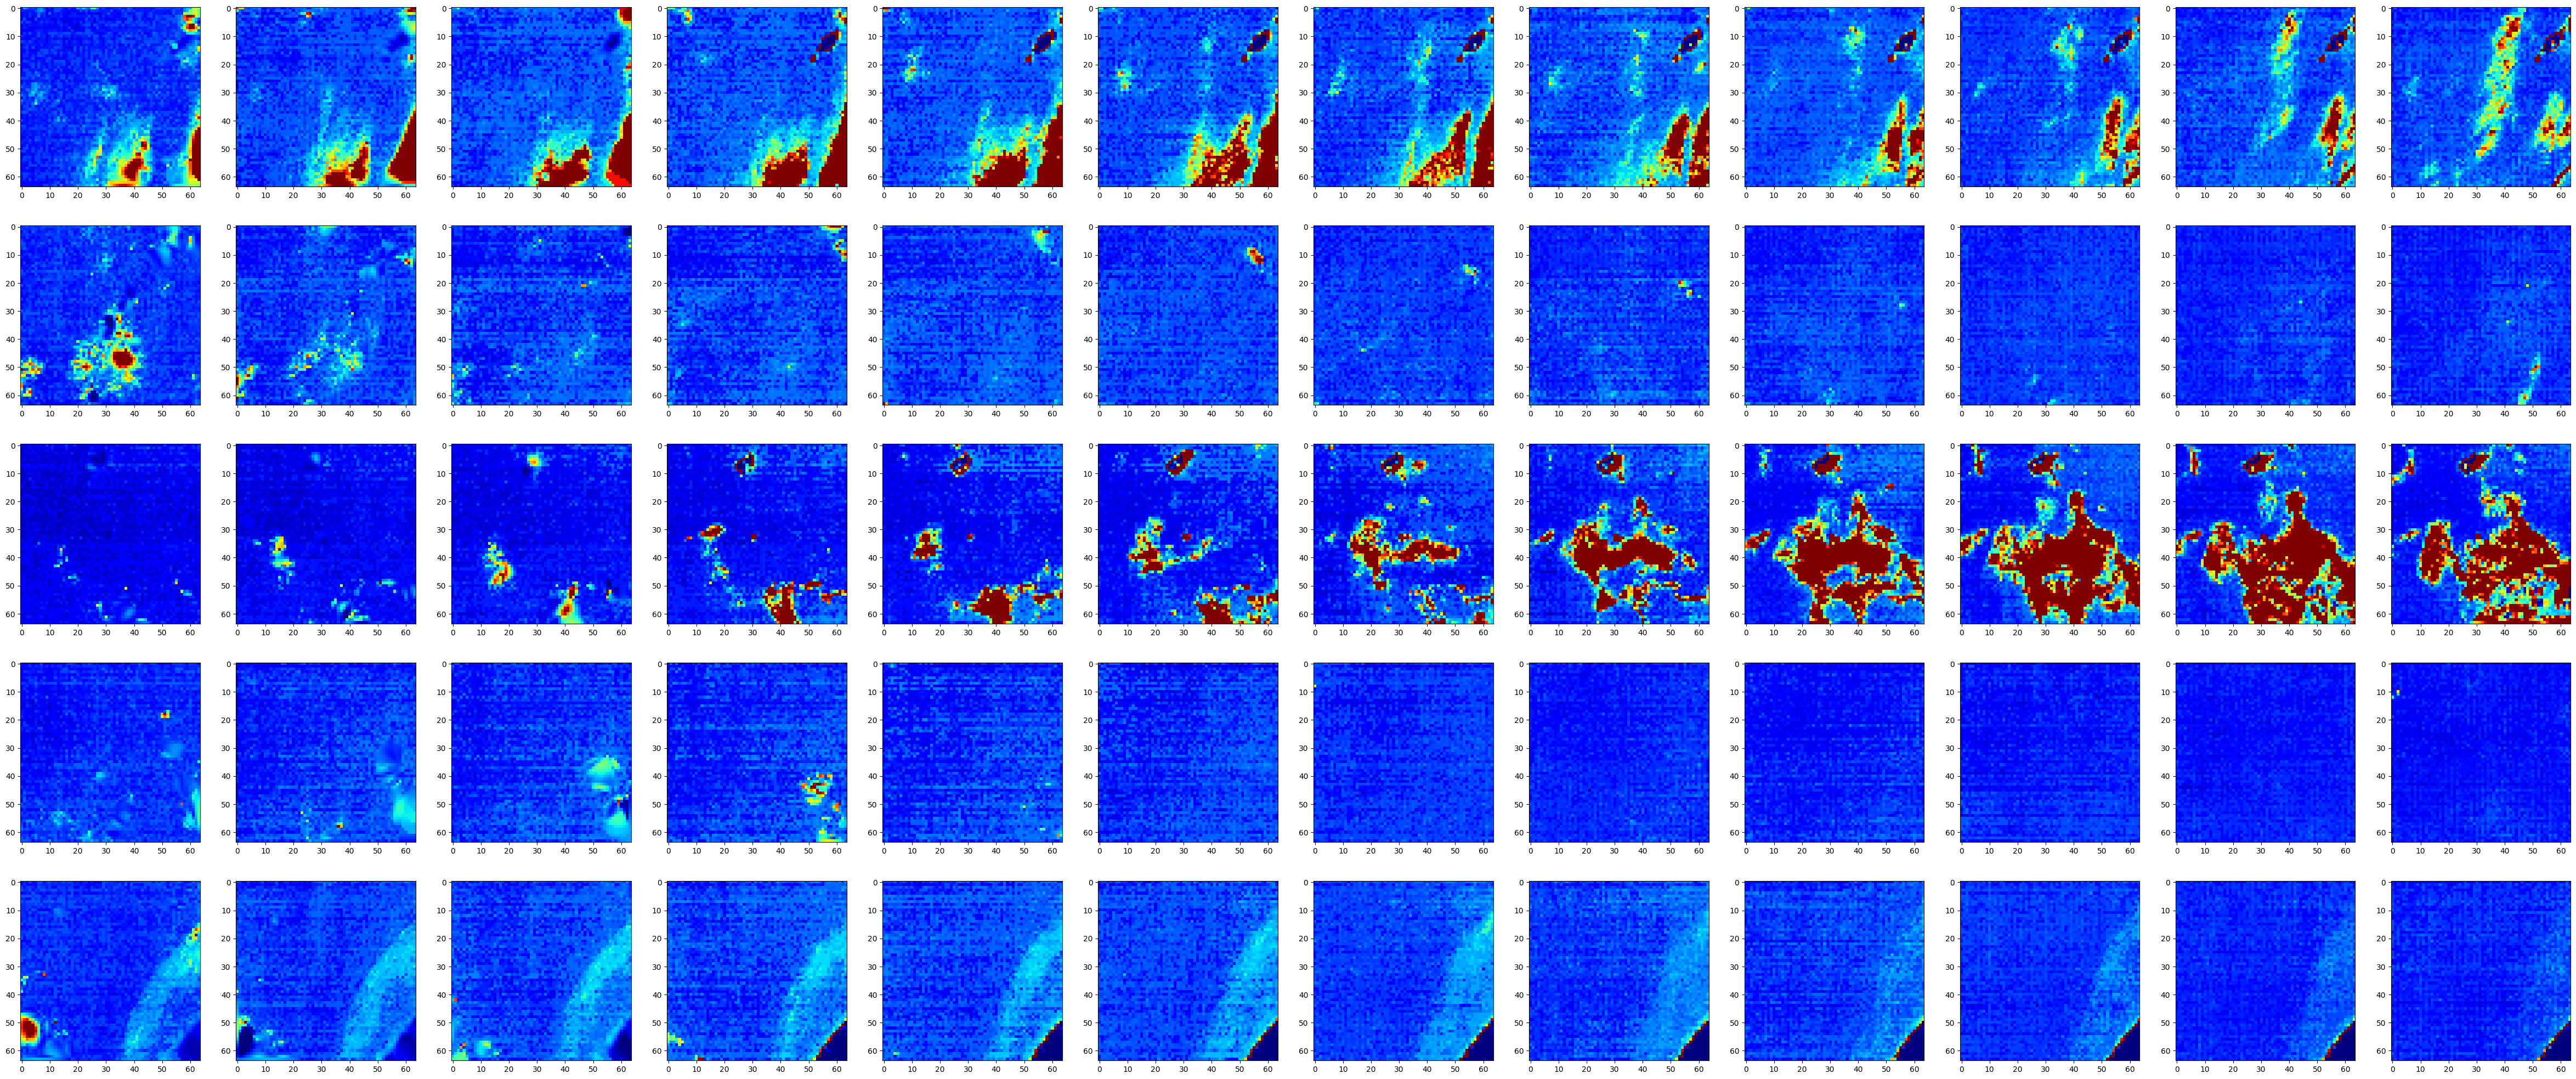

In [10]:
import numpy as np
for batch_idx, (inputs, targets) in enumerate(vis_loader):
    inputs = inputs.float().to(config.device)
    targets = targets.float().to(config.device)
    print(inputs.shape, targets.shape, inputs.max(), inputs.min())
    images = torch.cat([inputs, targets], dim=1)
    _, axarr = plt.subplots(images.shape[0], images.shape[1], figsize=(images.shape[1]*batch_size, images.shape[0]*batch_size))
    for b in range(images.shape[0]):
        for n in range(images.shape[1]):
            plot_img = images[b, n, 0].cpu().numpy()
            axarr[b][n].imshow(np.flip(plot_img, axis=0), cmap='jet', vmin=0, vmax=0.2)
    break

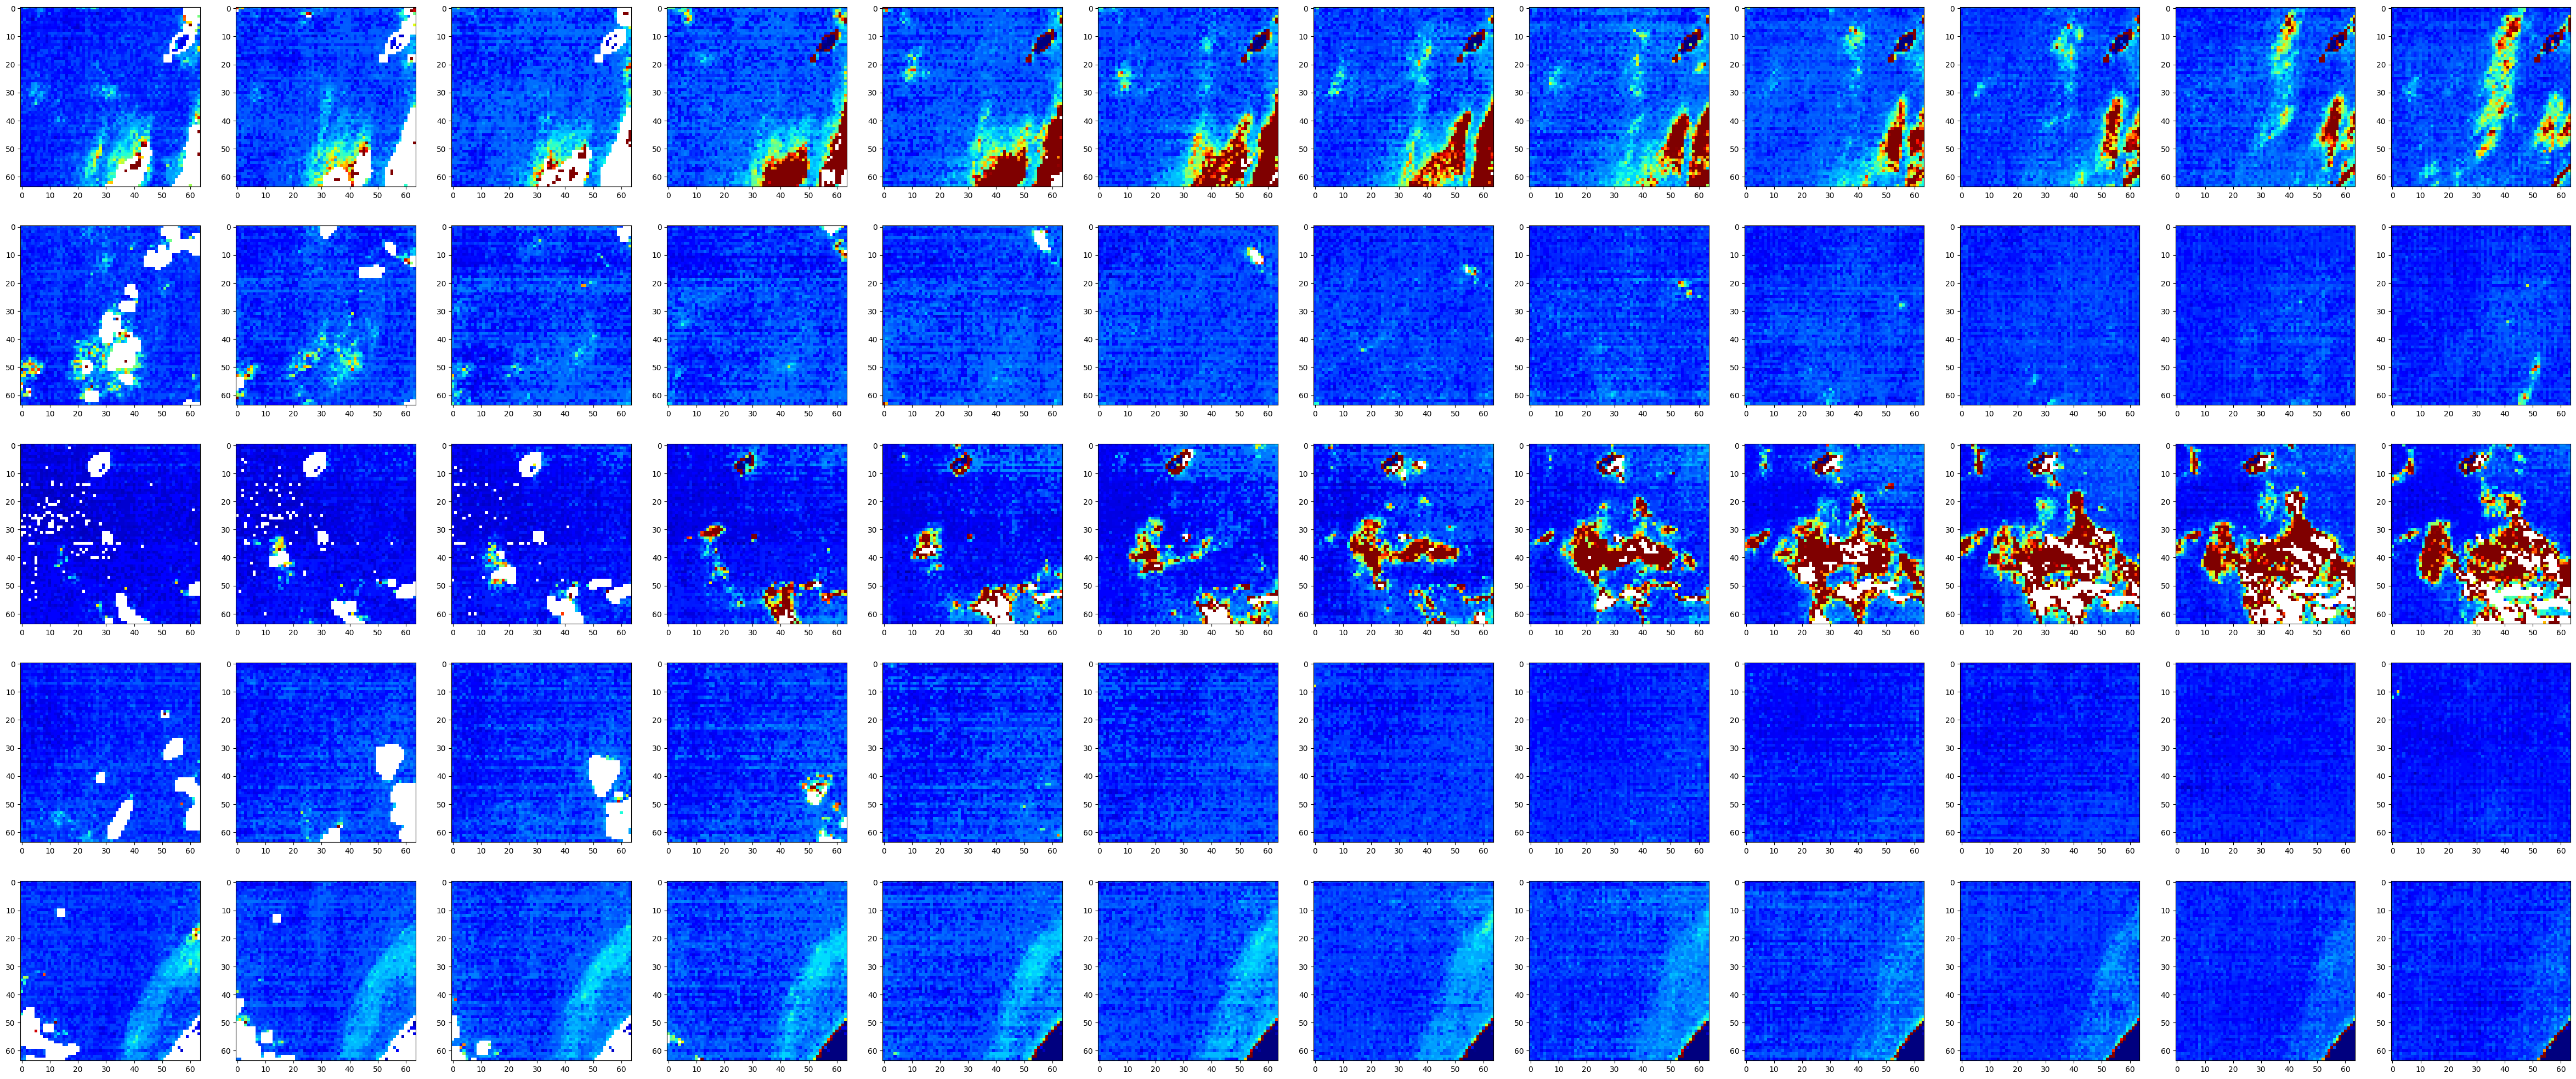

In [11]:
# Directly read with xarray then plot
import xarray as xr

ds = xr.open_dataset('datas/saved_aod_2023.nc')

fig, ax = plt.subplots(batch_size, 12, figsize=(12*batch_size, batch_size*batch_size))

for b in range(batch_size):
    for n in range(12):
        plot_img = ds['aod'][b*12+n].values
        ax[b][n].imshow(np.flip(plot_img, axis=0), cmap='jet', vmin=0, vmax=0.2)

plt.show()